# Import Libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings
import numpy as np
from numpy import array
from importlib import reload # to reload modules if we made changes to them without restarting kernel
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier # for features importance

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 200 # native screen dpi for my computer

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error, confusion_matrix, f1_score, accuracy_score, mean_absolute_error
from pandas.plotting import autocorrelation_plot

In [4]:
import tensorflow.keras as keras
from tensorflow.python.keras.optimizer_v2 import rmsprop
from functools import partial
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, TimeDistributed, LSTM, Dense, Bidirectional, Dropout, ConvLSTM2D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Convolution1D, BatchNormalization, LeakyReLU
from bayes_opt import BayesianOptimization

from tensorflow.keras.utils import plot_model

In [7]:
import functions
import plotting

SyntaxError: Lambda expression parameters cannot be parenthesized (functions.py, line 68)

In [ ]:
np.random.seed(66)

# Loading Data

In [ ]:
stocks = {}
try:
    stocks['TUP'] = pd.read_csv("TUP.csv", index_col='Date')
    stocks['TUP'].index = pd.to_datetime(stocks['TUP'].index)
    print("Successfully loaded: TUP")
except Exception as e:
    print(f"Failed to load: TUP. Error: {str(e)}")

Successfully loaded: TUP


# Baseline Model

In [ ]:
def baseline_model(stock):

    baseline_predictions = np.random.randint(0, 2, len(stock))
    accuracy = accuracy_score(functions.binary(stock), baseline_predictions)
    return accuracy

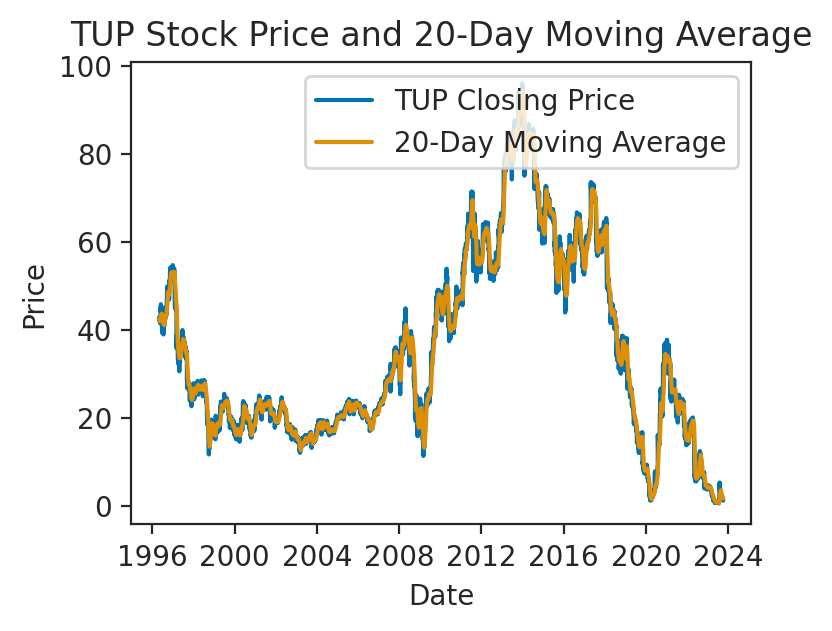

In [ ]:
if 'TUP' in stocks:
    stock_data = stocks['TUP']
    
    # Calculate a 20-day simple moving average
    stock_data['SMA_20'] = stock_data['Close'].rolling(window=20, min_periods=1).mean()
    
    # Visualize original closing prices and moving average
    plt.figure(figsize=(4, 3))
    plt.plot(stock_data['Close'], label='TUP Closing Price')
    plt.plot(stock_data['SMA_20'], label='20-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('TUP Stock Price and 20-Day Moving Average')
    plt.legend()
    plt.show()
else:
    print("No data available for stock 'TUP'.")

In [6]:
# Naive Forecast: Using the previous day's value as the prediction for the next day
stock_data['Naive_Forecast'] = stock_data['Close'].shift(1)

# Visualizing the Original vs. Naive Forecast
plt.figure(figsize=(5, 1))
plt.plot(stock_data['Close'], label='Actual Closing Price', marker='o')
plt.plot(stock_data['Naive_Forecast'], label='Naive Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TUP Stock Price and Naive Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Calculating Mean Absolute Error (ignoring the first entry as it will be NaN)
mae = mean_absolute_error(stock_data['Close'][1:], stock_data['Naive_Forecast'][1:])
print(f'Mean Absolute Error for Naive Forecast: {mae:.2f}')

NameError: name 'stock_data' is not defined